In [1]:
%env CONSOLE_WIDTH=140

from kiara.interfaces.python_api.workflow import Workflow
from kiara.utils.jupyter import graph_to_image
from kiara.utils.cli import terminal_print_model

env: CONSOLE_WIDTH=140


# Creating the workflow object <a class="anchor" id="create_workflow_obj"></a>

As the first step we create a [`Workflow`](https://dharpa.org/kiara/latest/reference/kiara/interfaces/python_api/workflow/) object, which is a convenience class that manages workflow state, internal consistency and history for us:

In [2]:
doc = """Returns 'True' if exactly one of it's two inputs is 'True'."""
workflow = Workflow.create("logic.xor", doc=doc, replace_existing_alias=True)

# Assembling the workflow <a class="anchor" id="assembly"></a>

The first step in the creation of our workflow is to create the individual steps from the available *kiara* modules.

A list of available modules and their aliases can be found here: TODO

## Creating the steps of the workflow <a class="anchor" id="creating_steps"></a>

In [3]:
# Creating step: or
workflow.add_step(operation="logic.or", step_id="or")

╭─ Step: or ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                                                                          │
│   step_id         or                                                                                                                     │
│   module type     logic.or                                                                                                               │
│   module_config   {                                                                                                                      │
│                     "delay": 0.0                                                                                                         │
│                   }                                                                                                                      │
│   module doc      Returns 'True' if one of the inputs is 'True'.                                                                         │
│   inputs                                                                                                                                 │
│                     field name   type      description                                                   Required   Default              │
│                    ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────    │
│                     or.a         boolean   A boolean describing this input state.                        yes        -- no default --     │
│                     or.b         boolean   A boolean describing this input state.                        yes        -- no default --     │
│                                                                                                                                          │
│   outputs                                                                                                                                │
│                     field name   type      description                                                                                   │
│                    ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────    │
│                     or.y         boolean   A boolean describing the module output state.                                                 │
│                                                                                                                                          │
│                                                                                                                                          │
╰──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

In [4]:
# Creating step: nand
step_nand_config = {'constants': {}, 'defaults': {}, 'pipeline_name': 'logic.nand', 'steps': [{'module_type': 'logic.and', 'module_config': {}, 'is_resolved': False, 'step_id': 'and', 'manifest_src': {'module_type': 'logic.and', 'module_config': {}, 'is_resolved': False}, 'input_links': {}, 'module_details': {'python_class_name': 'AndModule', 'python_module_name': 'kiara_plugin.core_types.modules.boolean', 'full_name': 'kiara_plugin.core_types.modules.boolean.AndModule', 'module_config': {'constants': {}, 'defaults': {}, 'delay': 0.0}, 'inputs_schema': {'a': {'type': 'boolean', 'type_config': {}, 'default': '__not_set__', 'optional': False, 'is_constant': False, 'doc': {'description': 'A boolean describing this input state.', 'doc': None}}, 'b': {'type': 'boolean', 'type_config': {}, 'default': '__not_set__', 'optional': False, 'is_constant': False, 'doc': {'description': 'A boolean describing this input state.', 'doc': None}}}, 'outputs_schema': {'y': {'type': 'boolean', 'type_config': {}, 'default': '__not_set__', 'optional': False, 'is_constant': False, 'doc': {'description': 'A boolean describing the module output state.', 'doc': None}}}}, 'doc': {'description': '-- n/a --', 'doc': None}}, {'module_type': 'logic.not', 'module_config': {}, 'is_resolved': False, 'step_id': 'not', 'manifest_src': {'module_type': 'logic.not', 'module_config': {}, 'is_resolved': False}, 'input_links': {'a': [{'step_id': 'and', 'value_name': 'y', 'sub_value': None}]}, 'module_details': {'python_class_name': 'NotModule', 'python_module_name': 'kiara_plugin.core_types.modules.boolean', 'full_name': 'kiara_plugin.core_types.modules.boolean.NotModule', 'module_config': {'constants': {}, 'defaults': {}, 'delay': 0.0}, 'inputs_schema': {'a': {'type': 'boolean', 'type_config': {}, 'default': '__not_set__', 'optional': False, 'is_constant': False, 'doc': {'description': 'A boolean describing this input state.', 'doc': None}}}, 'outputs_schema': {'y': {'type': 'boolean', 'type_config': {}, 'default': '__not_set__', 'optional': False, 'is_constant': False, 'doc': {'description': 'A boolean describing the module output state.', 'doc': None}}}}, 'doc': {'description': '-- n/a --', 'doc': None}}], 'input_aliases': {'and.a': 'a', 'and.b': 'b'}, 'output_aliases': {'not.y': 'y'}, 'doc': {'description': "Returns 'False' if both inputs are 'True'.", 'doc': None}, 'context': {}}
workflow.add_step(
    operation="pipeline",
    module_config=step_nand_config,
    step_id="nand")

╭─ Step: nand ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                                                                          │
│   step_id         nand                                                                                                                   │
│   module type     pipeline                                                                                                               │
│   module_config   {                                                                                                                      │
│                     "pipeline_name": "logic.nand",                                                                                       │
│                     "steps": [                                                                                                           │
│                       {                                                                                                                  │
│                         "step_id": "and",                                                                                                │
│                         "module_type": "logic.and"                                                                                       │
│                       },                                                                                                                 │
│                       {                                                                                                                  │
│                         "step_id": "not",                                                                                                │
│                         "module_type": "logic.not"                                                                                       │
│                       }                                                                                                                  │
│                     ],                                                                                                                   │
│                     "input_aliases": {                                                                                                   │
│                       "and.a": "a",                                                                                                      │
│                       "and.b": "b"                                                                                                       │
│                     },                                                                                                                   │
│                     "output_aliases": {                                                                                                  │
│                       "not.y": "y"                                                                                                       │
│                     },                                                                                                                   │
│                     "doc": {                                                                                                             │
│                       "description": "Returns 'False' if both inputs are 'True'.",                                                       │
│                       "doc": null                                                                                                        │
│                     },                                                                                                                   │
│                     "context": {}                                                                                                        │
│                   }                               

In [5]:
# Creating step: and
workflow.add_step(operation="logic.and", step_id="and")

╭─ Step: and ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                                                                          │
│   step_id         and                                                                                                                    │
│   module type     logic.and                                                                                                              │
│   module_config   {                                                                                                                      │
│                     "delay": 0.0                                                                                                         │
│                   }                                                                                                                      │
│   module doc      Returns 'True' if both inputs are 'True'.                                                                              │
│   inputs                                                                                                                                 │
│                     field name   type      description                                                   Required   Default              │
│                    ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────    │
│                     and.a        boolean   A boolean describing this input state.                        yes        -- no default --     │
│                     and.b        boolean   A boolean describing this input state.                        yes        -- no default --     │
│                                                                                                                                          │
│   outputs                                                                                                                                │
│                     field name   type      description                                                                                   │
│                    ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────    │
│                     and.y        boolean   A boolean describing the module output state.                                                 │
│                                                                                                                                          │
│                                                                                                                                          │
╰──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

In [6]:
# Connecting input(s) of step 'and'
workflow.connect_fields("and.a", "or.y")
workflow.connect_fields("and.b", "nand.y")

## Setting workflow input/output names (optional)

To make our workflow nicer to use, we can set aliases for its inputs and outputs.

In [7]:
workflow.set_input_alias(input_field="or.a", alias="a")
workflow.set_input_alias(input_field="or.b", alias="b")
workflow.set_input_alias(input_field="nand.a", alias="a")
workflow.set_input_alias(input_field="nand.b", alias="b")


workflow.set_output_alias(output_field="and.y", alias="y")

# Workflow information <a class="anchor" id="pipeline_info"></a>

After our workflow is wired up, we look can look at its structure, and other properties.


## Workflow status

A workflow consists of a series of 'states', the most relevant is always the most recent one. We can investigate
that latest states details like so:

In [8]:
workflow.current_state

╭──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                                                                          │
│  state id         zdpuAkqygSvVA8NiYZdFtbBK2Rs9Y4jGiquJvjPWFYMhQYk8y                                                                      │
│  pipeline inputs                                                                                                                         │
│                     field name   status    required   default   value id                                                                 │
│                    ──────────────────────────────────────────────────────────────────────────────────                                    │
│                     nand__a      not set   yes                  00000000-0000-0000-0000-000000000001                                     │
│                     nand__b      not set   yes                  00000000-0000-0000-0000-000000000001                                     │
│                     or__a        not set   yes                  00000000-0000-0000-0000-000000000001                                     │
│                     or__b        not set   yes                  00000000-0000-0000-0000-000000000001                                     │
│                                                                                                                                          │
│  steps            steps                                                                                                                  │
│                   ├── stage: 1                                                                                                           │
│                   │   ├── step: nand                                                                                                     │
│                   │   │   └── status: inputs invalid                                                                                     │
│                   │   │       ├── a: not set                                                                                             │
│                   │   │       └── b: not set                                                                                             │
│                   │   └── step: or                                                                                                       │
│                   │       └── status: inputs invalid                                                                                     │
│                   │           ├── a: not set                                                                                             │
│                   │           └── b: not set                                                                                             │
│                   └── stage: 2                                                                                                           │
│                       └── step: and                                                                                                      │
│                           └── status: inputs invalid                                                                                     │
│                               ├── a: not set                                                                                             │
│                               └── b: not set                                                                                             │
│  pipeline outputs                                                                                                                        │
│                     field name   status    type   value id                                                                               │
│                    ───────────────────────────────

## Pipeline execution graph

Let's look at the current execution graph for the current workflow pipeline:

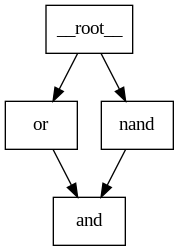

In [9]:
graph_to_image(workflow.pipeline.execution_graph)

# Workflow inputs <a class="anchor" id="pipeline_inputs"></a>

Once a workflow has an assembled pipeline, we can set it's inputs. We use the input field
names that we got from the result of the `workflow.current_state` call.

In [10]:
workflow.set_input("a", True)
workflow.set_input("b", True)


# process all workflow steps that can be processed
workflow.process_steps()

# print the current state, after we set our inputs
workflow.current_state

╭──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                                                                          │
│  state id         zdpuApYDQudSk8nS3yS5dVuRifeF4BnSjTefT336B8b1oq71x                                                                      │
│  pipeline inputs                                                                                                                         │
│                     field name   status   required   default   value id                                                                  │
│                    ─────────────────────────────────────────────────────────────────────────────────                                     │
│                     nand__a      valid    yes                  3ea777df-420b-4bb1-9500-30ef4425e128                                      │
│                     nand__b      valid    yes                  3ea777df-420b-4bb1-9500-30ef4425e128                                      │
│                     or__a        valid    yes                  3ea777df-420b-4bb1-9500-30ef4425e128                                      │
│                     or__b        valid    yes                  3ea777df-420b-4bb1-9500-30ef4425e128                                      │
│                                                                                                                                          │
│  steps            steps                                                                                                                  │
│                   ├── stage: 1                                                                                                           │
│                   │   ├── step: nand                                                                                                     │
│                   │   │   └── status: results ready                                                                                      │
│                   │   └── step: or                                                                                                       │
│                   │       └── status: results ready                                                                                      │
│                   └── stage: 2                                                                                                           │
│                       └── step: and                                                                                                      │
│                           └── status: results ready                                                                                      │
│  pipeline outputs                                                                                                                        │
│                     field name   status   type      value id                                                                             │
│                    ──────────────────────────────────────────────────────────────────────                                                │
│                     nand__y      valid    boolean   19529342-2add-47e5-a802-0aaed0240f97                                                 │
│                     or__y        valid    boolean   c298652f-46b6-49c9-b006-5a2f45283c86                                                 │
│                     and__y       valid    boolean   570393c6-d7d7-417e-b97f-550c53c05588                                                 │
│                                                                                                                                          │
│                                                                                                                                          │
╰───────────────────────────────────────────────────

# Workflow outputs <a class="anchor" id="pipeline_outputs"></a>

To print the actual data of the workflows' current outputs, we call the `current_output_values` property of the workflow object:

In [11]:
workflow.current_output_values

╭──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                                                                          │
│   field   value                                                                                                                          │
│  ───────────────                                                                                                                         │
│   y       False                                                                                                                          │
│                                                                                                                                          │
╰──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

# Workflow snapshot <a class="anchor" id="snapshot"></a>

So far, our workflow only exists in memory. If we want to save it so we can have a look at it again at a later stage, we can snapshot the current state, which will save the current structure of the internal pipeline, as well as all inputs that are currently used. In addition, this will register the workflow under the alias we specified on top of this file when creating the `Workflow` object (in our case: `logic.xor`).

If we would not not specify `save=True`, the structure of the pipeline and inputs would still be frozen and kept, but only in memory, and we'd only be able to access it in our current session.

In [12]:
workflow.snapshot(save=True)

╭──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                                                                          │
│  state id         zdpuApYDQudSk8nS3yS5dVuRifeF4BnSjTefT336B8b1oq71x                                                                      │
│  pipeline inputs                                                                                                                         │
│                     field name   status   required   default   value id                                                                  │
│                    ─────────────────────────────────────────────────────────────────────────────────                                     │
│                     nand__a      valid    yes                  3ea777df-420b-4bb1-9500-30ef4425e128                                      │
│                     nand__b      valid    yes                  3ea777df-420b-4bb1-9500-30ef4425e128                                      │
│                     or__a        valid    yes                  3ea777df-420b-4bb1-9500-30ef4425e128                                      │
│                     or__b        valid    yes                  3ea777df-420b-4bb1-9500-30ef4425e128                                      │
│                                                                                                                                          │
│  steps            steps                                                                                                                  │
│                   ├── stage: 1                                                                                                           │
│                   │   ├── step: nand                                                                                                     │
│                   │   │   └── status: results ready                                                                                      │
│                   │   └── step: or                                                                                                       │
│                   │       └── status: results ready                                                                                      │
│                   └── stage: 2                                                                                                           │
│                       └── step: and                                                                                                      │
│                           └── status: results ready                                                                                      │
│  pipeline outputs                                                                                                                        │
│                     field name   status   type      value id                                                                             │
│                    ──────────────────────────────────────────────────────────────────────                                                │
│                     nand__y      valid    boolean   19529342-2add-47e5-a802-0aaed0240f97                                                 │
│                     or__y        valid    boolean   c298652f-46b6-49c9-b006-5a2f45283c86                                                 │
│                     and__y       valid    boolean   570393c6-d7d7-417e-b97f-550c53c05588                                                 │
│                                                                                                                                          │
│                                                                                                                                          │
╰───────────────────────────────────────────────────

Now, we can access our workflow in other environments, for example from the commandline:

In [13]:
! kiara workflow list


                                                                                                                                            
  alias(es)        workflow_id                            # steps   # stages   # states   description                                       
 ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── 
  a2               08a53df4-9ea8-480e-9691-1cf9b868fc0c   2         2          1          -- n/a --                                         
  logic.xor        0ede1f36-f330-4e1b-8536-761e33f0cc83   3         2          1          Returns 'True' if exactly one of it's two inputs  
                                                                                          is 'True'.                                        
  topic-modeling   b5cdc05f-86a1-4c62-a2c3-1a854ce454b5   9         6          1          -- n/a --                                         
  topic_mode

In [14]:
! kiara workflow explain logic.xor

╭─ Workflow: logic.xor ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                                                                          │
│  documentation                                                                                                                           │
│                          Returns 'True' if exactly one of it's two inputs is 'True'.                                                     │
│                                                                                                                                          │
│  author(s)                                                                                                                               │
│                                                                                                                                          │
│  workflow i